# Problem set 5

In [1]:
import random
from math import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from copy import deepcopy

## Cyclic smoothing

In [2]:
# plot each iteration of path smoothing
def plot_smooth(path, fix=None):
    x1 = [row[0] for row in path]
    y1 = [row[1] for row in path]
    x2 = deepcopy(x1)
    y2 = deepcopy(y1)


    # get all intermediate smoothened paths
    if fix:
        paths = smooth(path, fix=fix, save_intermediate=True)
    else:
        paths = smooth(path, save_intermediate=True)

    # for larger numbers of smoothing steps, plot only every nth step
    if len(paths) > 20:
        include_step = list(map(int, np.floor(np.linspace(0, len(paths), 10))))
        # always include the final path
        if (len(paths) - 1) not in include_step:
            include_step.append((len(paths) - 1))
    else:
        include_step = range(20)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.close()
    ax.cla()

    ax.plot(x1, y1, '-r')
    ax.plot(x2, y2, '-g')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Smoothing step 0")

    display(fig)    
    clear_output(wait = True)
    plt.pause(0.2) 

    for step, smooth_path in enumerate(paths):
        if step not in include_step:
            continue
        ax.cla()
        x2 = [row[0] for row in smooth_path]
        y2 = [row[1] for row in smooth_path]

        ax.plot(x1, y1, '-r')
        ax.plot(x2, y2, '-g')

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title(f"Smoothing step {step + 1}")

        display(fig)    
        clear_output(wait = True)
        plt.pause(0.1)

In [3]:
# -------------
# User Instructions
#
# Here you will be implementing a cyclic smoothing
# algorithm. This algorithm should not fix the end
# points (as you did in the unit quizzes). You  
# should use the gradient descent equations that
# you used previously.
#
# Your function should return the newpath that it
# calculates.
#
# Feel free to use the provided solution_check function
# to test your code. You can find it at the bottom.
#
# --------------


# Do not modify path inside your function.
path=[[0, 0], 
      [1, 0],
      [2, 0],
      [3, 0],
      [4, 0],
      [5, 0],
      [6, 0],
      [6, 1],
      [6, 2],
      [6, 3],
      [5, 3],
      [4, 3],
      [3, 3],
      [2, 3],
      [1, 3],
      [0, 3],
      [0, 2],
      [0, 1]]

############# ONLY ENTER CODE BELOW THIS LINE ##########

# ------------------------------------------------
# smooth coordinates
# If your code is timing out, make the tolerance parameter
# larger to decrease run time.
#

def smooth(path, weight_data = 0.1, weight_smooth = 0.1, tolerance = 0.00001,
    iter_max=1000, save_intermediate=False):

    # Make a deep copy of path into newpath
    newpath = deepcopy(path)

    # optionally store all intermediate paths
    if save_intermediate:
        paths = []

    # track how big the change is in each step
    # either stop on convergence (change below tolerance)
    # or after iter_max iterations.
    iter_count = 0
    change = tolerance
    while change >= tolerance:
        change = 0.0
        if iter_count >= iter_max:
            raise(Warning("Convergence not reached within max iterations."))
            return newpath

        # update all points and wrap around to the start of the path
        for i in range(len(path)):
            for j in range(len(path[i])):
                previous_path_val = newpath[i][j]
                newpath[i][j] += (
                    weight_data * (path[i][j] - newpath[i][j]) +
                    weight_smooth * (
                        newpath[(i + 1) % len(path)][j]
                        + newpath[(i - 1) % len(path)][j] - 2 * newpath[i][j])
                )
                # total change over all points in the path
                change += abs(newpath[i][j] - previous_path_val)
        # optionally save the new path
        if save_intermediate:
            paths.append(newpath)
        iter_count += 1
    if save_intermediate:
        return paths
    return newpath

# thank you - EnTerr - for posting this on our discussion forum

newpath = smooth(path)
for i in range(len(path)):
   print('['+ ', '.join('%.3f'%x for x in path[i]) +'] -> ['+ ', '.join('%.3f'%x for x in newpath[i]) +']')


[0.000, 0.000] -> [0.471, 0.424]
[1.000, 0.000] -> [1.176, 0.165]
[2.000, 0.000] -> [2.059, 0.071]
[3.000, 0.000] -> [3.000, 0.047]
[4.000, 0.000] -> [3.941, 0.071]
[5.000, 0.000] -> [4.824, 0.165]
[6.000, 0.000] -> [5.529, 0.424]
[6.000, 1.000] -> [5.765, 1.106]
[6.000, 2.000] -> [5.765, 1.894]
[6.000, 3.000] -> [5.529, 2.576]
[5.000, 3.000] -> [4.824, 2.835]
[4.000, 3.000] -> [3.941, 2.929]
[3.000, 3.000] -> [3.000, 2.953]
[2.000, 3.000] -> [2.059, 2.929]
[1.000, 3.000] -> [1.176, 2.835]
[0.000, 3.000] -> [0.471, 2.576]
[0.000, 2.000] -> [0.235, 1.894]
[0.000, 1.000] -> [0.235, 1.106]


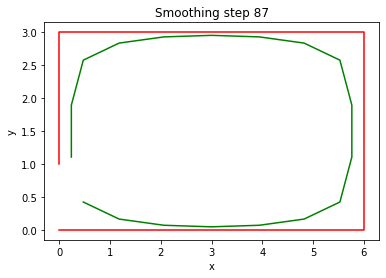

In [4]:
plot_smooth(path)

In [5]:
##### TESTING ######

# --------------------------------------------------
# check if two numbers are 'close enough,'used in
# solution_check function.
#
def close_enough(user_answer, true_answer, epsilon = 0.001):
    if abs(user_answer - true_answer) > epsilon:
        return False
    return True

# --------------------------------------------------
# check your solution against our reference solution for
# a variety of test cases (given below)
#
def solution_check(newpath, answer):
    if type(newpath) != type(answer):
        print("Error. You do not return a list.")
        return False
    if len(newpath) != len(answer):
        print('Error. Your newpath is not the correct length.')
        return False
    if len(newpath[0]) != len(answer[0]):
        print('Error. Your entries do not contain an (x, y) coordinate pair.')
        return False
    for i in range(len(newpath)): 
        for j in range(len(newpath[0])):
            if not close_enough(newpath[i][j], answer[i][j]):
                print('Error, at least one of your entries is not correct.')
                return False
    print("Test case correct!")
    return True

# --------------
# Testing Instructions
# 
# To test your code, call the solution_check function with
# two arguments. The first argument should be the result of your
# smooth function. The second should be the corresponding answer.
# For example, calling
#
# solution_check(smooth(testpath1), answer1)
#
# should return True if your answer is correct and False if
# it is not.
    
testpath1 = [[0, 0],
             [1, 0],
             [2, 0],
             [3, 0],
             [4, 0],
             [5, 0],
             [6, 0],
             [6, 1],
             [6, 2],
             [6, 3],
             [5, 3],
             [4, 3],
             [3, 3],
             [2, 3],
             [1, 3],
             [0, 3],
             [0, 2],
             [0, 1]]

answer1 = [[0.4705860385182691, 0.4235279620576893], 
           [1.1764695730296597, 0.16470408411716733], 
           [2.058823799247812, 0.07058633859438503], 
           [3.000001503542886, 0.04705708651959327], 
           [3.9411790099468273, 0.07058689299792453], 
           [4.8235326678889345, 0.16470511854183797], 
           [5.529415336860586, 0.4235293374365447], 
           [5.76470933698621, 1.1058829941330384], 
           [5.764708805535902, 1.8941189433780983], 
           [5.5294138118186265, 2.5764724018811056], 
           [4.823530348360371, 2.835296251305122], 
           [3.941176199414957, 2.929413985845729],
           [2.9999985709076413, 2.952943245204772], 
           [2.0588211310939526, 2.9294134622132018], 
           [1.1764675231284938, 2.8352952720424938], 
           [0.4705848811030855, 2.5764710948028178], 
           [0.23529088056307781, 1.8941174802285707], 
           [0.23529138316655338, 1.1058815684272394]]

testpath2 = [[1, 0], # Move in the shape of a plus sign
             [2, 0],
             [2, 1],
             [3, 1],
             [3, 2],
             [2, 2],
             [2, 3],
             [1, 3],
             [1, 2],
             [0, 2], 
             [0, 1],
             [1, 1]]

answer2 = [[1.2222234770374059, 0.4444422843711052],
           [1.7777807251383388, 0.4444432993123497], 
           [2.111114925633848, 0.8888894279539462], 
           [2.5555592020540376, 1.2222246475393077], 
           [2.5555580686154244, 1.7777817817879298], 
           [2.111111849558437, 2.1111159707965514], 
           [1.7777765871460525, 2.55556033483712], 
           [1.2222194640861452, 2.5555593592828543], 
           [0.8888853322565222, 2.111113321684573], 
           [0.44444105139827167, 1.777778212019149], 
           [0.44444210978390364, 1.2222211690821811], 
           [0.8888882042812255, 0.8888870211766268]]

solution_check(smooth(testpath1), answer1)
solution_check(smooth(testpath2), answer2)

Test case correct!
Test case correct!


True

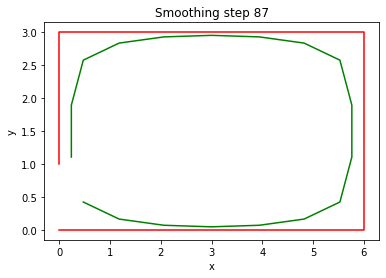

In [6]:
plot_smooth(testpath1)

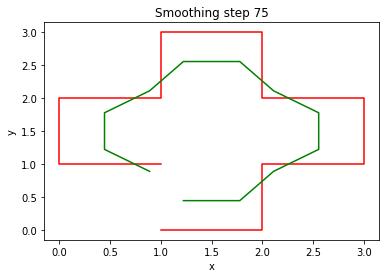

In [7]:
plot_smooth(testpath2)

## Constrained smoothing
The cross-shaped path above currently results in a smoothing solution that is quite far off the original path, as it cuts the corners. In order to avoid this, we can fix certain points (for instance the corners of the path) so that they are retained.

In [8]:
# -------------
# User Instructions
#
# Now you will be incorporating fixed points into
# your smoother. 
#
# You will need to use the equations from gradient
# descent AND the new equations presented in the
# previous lecture to implement smoothing with
# fixed points.
#
# Your function should return the newpath that it
# calculates. 
#
# Feel free to use the provided solution_check function
# to test your code. You can find it at the bottom.
#

######################## ENTER CODE BELOW HERE #########################

def smooth(path, fix, weight_data = 0.0, weight_smooth = 0.1, tolerance = 0.00001,
    iter_max=10000, save_intermediate=False):

    # Make a deep copy of path into newpath
    newpath = deepcopy(path)

    # optionally store all intermediate paths
    if save_intermediate:
        paths = []

    # track how big the change is in each step
    # either stop on convergence (change below tolerance)
    # or after iter_max iterations.
    iter_count = 0
    change = tolerance
    while change >= tolerance:
        change = 0.0
        if iter_count >= iter_max:
            raise(Warning("Convergence not reached within max iterations."))
            return newpath

        # update all points except the startpoint and endpoint
        for i in range(len(path)):
            if not fix[i]:
                for j in range(len(path[i])):
                    previous_path_val = newpath[i][j]
                    newpath[i][j] += (
                        weight_smooth * (
                            newpath[(i + 1) % len(path)][j] +
                            newpath[(i - 1) % len(path)][j] -
                            2 * newpath[i][j]
                        ) +
                        # smooth over previous two and next two points,
                        # weighing the adjacent point twice as strongly as the
                        # next-to-adjacent ones.
                        (weight_smooth / 2.0) * (
                            2 * newpath[(i - 1) % len(path)][j] -
                            newpath[(i - 2) % len(path)][j] -
                            newpath[i][j]
                        ) +
                        (weight_smooth / 2.0) * (
                            2 * newpath[(i + 1) % len(path)][j] -
                            newpath[(i + 2) % len(path)][j] -
                            newpath[i][j]
                        )
                    )
                    # total change over all points in the path
                    change += abs(newpath[i][j] - previous_path_val)
        # optionally save the new path
        if save_intermediate:
            paths.append(newpath)
        iter_count += 1
    if save_intermediate:
        return paths
    return newpath

In [9]:
testpaths = [
    [[0, 0],[1, 0],[2, 0],[3, 0],[4, 0],[5, 0],[6, 0],[6, 1],[6, 2],[6, 3],[5, 3],[4, 3],[3, 3],[2, 3],[1, 3],[0, 3],[0, 2],[0, 1]],
    [[0, 0],[2, 0],[4, 0],[4, 2],[4, 4],[2, 4],[0, 4],[0, 2]]
    ]
testfixpts = [
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 1, 0, 1, 0]
    ]

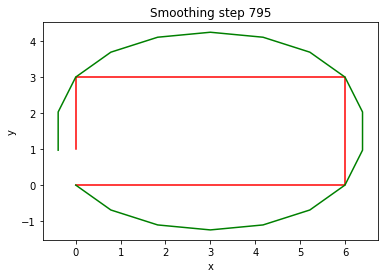

In [10]:
plot_smooth(testpaths[0], testfixpts[0])

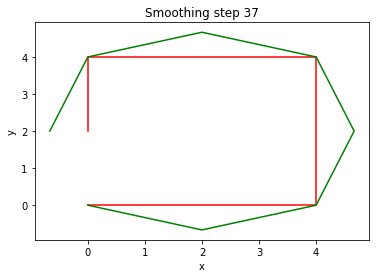

In [11]:
plot_smooth(testpaths[1], testfixpts[1])

In [12]:
# --------------
# Testing Instructions
# 
# To test your code, call the solution_check function with the argument smooth:
# solution_check(smooth)
#

def solution_check(smooth, eps = 0.0001):
    
    def test_case_str(path, fix):
        assert( len(path) == len(fix) )

        if len(path) == 0:
            return '[]'
        if len(path) == 1:
            s = '[' + str(path[0]) + ']'
            if fix[0]: s += ' #fix'
            return s

        s = '[' + str(path[0]) + ','
        if fix[0]: s += ' #fix'
        for pt,f in zip(path[1:-1],fix[1:-1]):
            s += '\n ' + str(pt) + ','
            if f: s += ' #fix'
        s += '\n ' + str(path[-1]) + ']'
        if fix[-1]: s += ' #fix'
        return s
    
    testpaths = [[[0, 0],[1, 0],[2, 0],[3, 0],[4, 0],[5, 0],[6, 0],[6, 1],[6, 2],[6, 3],[5, 3],[4, 3],[3, 3],[2, 3],[1, 3],[0, 3],[0, 2],[0, 1]],
                 [[0, 0],[2, 0],[4, 0],[4, 2],[4, 4],[2, 4],[0, 4],[0, 2]]]
    testfixpts = [[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                  [1, 0, 1, 0, 1, 0, 1, 0]]
    pseudo_answers = [[[0, 0],[0.7938620981547201, -0.8311168821106101],[1.8579052986461084, -1.3834788165869276],[3.053905318597796, -1.5745863173084],[4.23141390533387, -1.3784271816058231],[5.250184859723701, -0.8264215958231558],[6, 0],[6.415150091996651, 0.9836951698796843],[6.41942442687092, 2.019512290770163],[6, 3],[5.206131365604606, 3.831104483245191],[4.142082497497067, 4.383455704596517],[2.9460804122779813, 4.5745592975708105],[1.768574219397359, 4.378404668718541],[0.7498089205417316, 3.826409771585794],[0, 3],[-0.4151464728194156, 2.016311854977891],[-0.4194207879552198, 0.9804948340550833]],
                      [[0, 0],[2.0116767115496095, -0.7015439080661671],[4, 0],[4.701543905420104, 2.0116768147460418],[4, 4],[1.9883231877640861, 4.701543807525115],[0, 4],[-0.7015438099112995, 1.9883232808252207]]]
    true_answers = [[[0, 0],[0.7826068175979299, -0.6922616156406778],[1.826083356960912, -1.107599209206985],[2.999995745732953, -1.2460426422963626],[4.173909508264126, -1.1076018591282746],[5.217389489606966, -0.6922642758483151],[6, 0],[6.391305105067843, 0.969228211275216],[6.391305001845138, 2.0307762911524616],[6, 3],[5.217390488523538, 3.6922567975830876],[4.17391158149052, 4.107590195596796],[2.9999982969959467, 4.246032043344827],[1.8260854997325473, 4.107592961155283],[0.7826078838205919, 3.692259569132191],[0, 3],[-0.3913036785959153, 2.030774470796648], [-0.3913035729270973, 0.9692264531461132]],
                    [[0, 0],[1.9999953708444873, -0.6666702980585777],[4, 0],[4.666670298058577, 2.000005101453379],[4, 4],[1.9999948985466212, 4.6666612524128],[0, 4],[-0.6666612524127998, 2.000003692691148]]]
    newpaths = map(lambda p: smooth(*p), zip(testpaths,testfixpts))
    
    correct = True
    
    for path,fix,p_answer,t_answer,newpath in zip(testpaths,testfixpts,
                                                   pseudo_answers,true_answers,
                                                   newpaths):
        if type(newpath) != list:
            print("Error: smooth did not return a list for the path:")
            print(test_case_str(path,fix) + '\n')
            correct = False
            continue
        if len(newpath) != len(path):
            print("Error: smooth did not return a list of the correct length for the path:")
            print(test_case_str(path,fix) + '\n')
            correct = False
            continue

        good_pairs = True
        for newpt,pt in zip(newpath,path): 
            if len(newpt) != len(pt):
                good_pairs = False
                break
        if not good_pairs:
            print("Error: smooth did not return a list of coordinate pairs for the path:")
            print(test_case_str(path,fix) + '\n')
            correct = False
            continue
        assert( good_pairs )
        
        # check whether to check against true or pseudo answers
        answer = None
        if abs(newpath[1][0] - t_answer[1][0]) <= eps:
            answer = t_answer
        elif abs(newpath[1][0] - p_answer[1][0]) <= eps:
            answer = p_answer
        else:
            print('smooth returned an incorrect answer for the path:')
            print(test_case_str(path,fix) + '\n')
            continue
        assert( answer is not None )

        entries_match = True
        for p,q in zip(newpath,answer):
            for pi,qi in zip(p,q):
                if abs(pi - qi) > eps:
                    entries_match = False
                    break
            if not entries_match: break
        if not entries_match:
            print('smooth returned an incorrect answer for the path:')
            print(test_case_str(path,fix) + '\n')
            continue
            
        assert( entries_match )
        if answer == t_answer:
            print('smooth returned the correct answer for the path:')
            print(test_case_str(path,fix) + '\n')
        elif answer == p_answer:
            print('smooth returned a correct* answer for the path:')
            print(test_case_str(path,fix))
            print('''*However, your answer uses the "nonsimultaneous" update method, which
is not technically correct. You should modify your code so that newpath[i][j] is only 
updated once per iteration, or else the intermediate updates made to newpath[i][j]
will affect the final answer.\n''')

solution_check(smooth)


smooth returned the correct answer for the path:
[[0, 0], #fix
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0], #fix
 [6, 1],
 [6, 2],
 [6, 3], #fix
 [5, 3],
 [4, 3],
 [3, 3],
 [2, 3],
 [1, 3],
 [0, 3], #fix
 [0, 2],
 [0, 1]]

smooth returned the correct answer for the path:
[[0, 0], #fix
 [2, 0],
 [4, 0], #fix
 [4, 2],
 [4, 4], #fix
 [2, 4],
 [0, 4], #fix
 [0, 2]]



## Racetrack control

In [13]:
# --------------
# User Instructions
# 
# Define a function cte in the robot class that will
# compute the crosstrack error for a robot on a
# racetrack with a shape as described in the video.
#
# You will need to base your error calculation on
# the robot's location on the track. Remember that 
# the robot will be traveling to the right on the
# upper straight segment and to the left on the lower
# straight segment.
#
# --------------
# Grading Notes
#
# We will be testing your cte function directly by
# calling it with different robot locations and making
# sure that it returns the correct crosstrack error.  


class robot:

    # --------
    # init: 
    #    creates robot and initializes location/orientation to 0, 0, 0
    #

    def __init__(self, length = 20.0):
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    # --------
    # set: 
    #	sets a robot coordinate
    #

    def set(self, new_x, new_y, new_orientation):

        self.x = float(new_x)
        self.y = float(new_y)
        self.orientation = float(new_orientation) % (2.0 * pi)


    # --------
    # set_noise: 
    #	sets the noise parameters
    #

    def set_noise(self, new_s_noise, new_d_noise):
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = float(new_s_noise)
        self.distance_noise = float(new_d_noise)

    # --------
    # set_steering_drift: 
    #	sets the systematical steering drift parameter
    #

    def set_steering_drift(self, drift):
        self.steering_drift = drift
        
    # --------
    # move: 
    #    steering = front wheel steering angle, limited by max_steering_angle
    #    distance = total distance driven, most be non-negative

    def move(self, steering, distance, 
             tolerance = 0.001, max_steering_angle = pi / 4.0):

        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0


        # make a new copy
        res = robot()
        res.length         = self.length
        res.steering_noise = self.steering_noise
        res.distance_noise = self.distance_noise
        res.steering_drift = self.steering_drift

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = tan(steering2) * distance2 / res.length

        if abs(turn) < tolerance:

            # approximate by straight line motion

            res.x = self.x + (distance2 * cos(self.orientation))
            res.y = self.y + (distance2 * sin(self.orientation))
            res.orientation = (self.orientation + turn) % (2.0 * pi)

        else:

            # approximate bicycle model for motion

            radius = distance2 / turn
            cx = self.x - (sin(self.orientation) * radius)
            cy = self.y + (cos(self.orientation) * radius)
            res.orientation = (self.orientation + turn) % (2.0 * pi)
            res.x = cx + (sin(res.orientation) * radius)
            res.y = cy - (cos(res.orientation) * radius)

        return res


    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]'  % (self.x, self.y, self.orientation)


############## ONLY ADD / MODIFY CODE BELOW THIS LINE ####################
   
    def cte(self, radius):
        x = self.x
        y = self.y
        theta = self.orientation

        # Calculate the coordinates of the center of the circle
        # for the curved parts of the track, or the center of the
        # circle of which the straight part of the track is a
        # tangent line. Track coordinates denoted as (h, k).

        k = radius

        # western curve
        if x <= radius:
            h = radius
        # eastern curve
        elif x >= 3 * radius:
            h = 3 * radius
        # straight track
        else:
            h = x

        # signed shortest distance to track
        cte = sqrt((x - h)**2 + (y - k)**2) - radius

        return cte
    
############## ONLY ADD / MODIFY CODE ABOVE THIS LINE ####################

In [15]:
# ------------------------------------------------------------------------
#
# run - does a single control run.


def run(params, radius, printflag = False):
    myrobot = robot()
    myrobot.set(0.0, radius, pi / 2.0)
    speed = 1.0 # motion distance is equal to speed (we assume time = 1)
    err = 0.0
    int_crosstrack_error = 0.0
    N = 200

    crosstrack_error = myrobot.cte(radius) # You need to define the cte function!

    for i in range(N*2):
        diff_crosstrack_error = - crosstrack_error
        crosstrack_error = myrobot.cte(radius)
        diff_crosstrack_error += crosstrack_error
        int_crosstrack_error += crosstrack_error
        steer = - params[0] * crosstrack_error \
                - params[1] * diff_crosstrack_error \
                - params[2] * int_crosstrack_error
        myrobot = myrobot.move(steer, speed)
        if i >= N:
            err += crosstrack_error ** 2
        if printflag:
            print(myrobot)
    return err / float(N)

radius = 25.0
params = [10.0, 15.0, 0]
err = run(params, radius, False)
print('\nFinal parameters: ', params, '\n ->', err)



Final parameters:  [10.0, 15.0, 0] 
 -> 0.005868504812758084
